# Data Science Project: Planning Stage – **UBC Minecraft Research Server**

**Student:** Shaurya V. Shastri  
**Date:** 2025-11-14         
**Course:** DSCI100-009

---
GitHub Repository: https://github.com/shaurya7vs/dsci-project.git

In [24]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

In [25]:
# reading in data
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


# 1) Data Description

**Files:**
- `players.csv`: one row per unique player with player-level attributes.
- `sessions.csv`: one row per play session with session-level attributes.

Below we loaded both datasets and produce summaries: number of observations/variables, variable names and types, and simple summaries for quantitative columns. Values are reported to **2 decimal places**.

---

## 1. Meaning of Variables

### Players Dataset
The players dataset contains information about each individual player who has logged into the server. The variables typically represent:

- **player_id** - unique identifier assigned to each player; also links to the sessions table.
- **join_date** - date when the player first connected to the server.
- **country / region** - geographic location of the player, if provided.
- **age or demographic fields** - optional characteristics about the player.
- **total_sessions** - total number of gameplay sessions recorded for that player.
- **total_playtime** - total time spent on the server across all sessions.
- **other gameplay metrics** - variables describing player behaviour, performance, or participation.

### Sessions Dataset
The sessions dataset records each individual play session for every player. Variables generally represent:

- **session_id** - unique identifier for a session.
- **player_id** - links the session back to the player who generated it.
- **start_time** - timestamp when the session began.
- **end_time** - timestamp when the session ended.
- **duration** - total length of the session.
- **actions_count** - number of in-game actions performed during the session.
- **movement_distance** - approximate distance moved by the player in the session.
- **other metrics** - additional variables describing gameplay or logging details.

---

## 2. Visible Data Issues

- Missing values appear in several variables.
- Some variables may have incorrect data types (e.g., timestamps stored as characters).
- Numeric variables contain possible outliers (extreme session lengths or action counts).
- Possible duplicate rows in either dataset.
- Some players show unusually low or high total activity.

---

## 3. Potential Hidden Issues

- Server lag or disconnects may distort session timestamps.
- Automatic logging may introduce measurement error.
- Self-selection bias: only players who joined the research server are included.

---

## 4. How the Data Were Collected

- Data comes from a UBC research Minecraft server.
- Player behaviour and events were logged automatically by the system.
- Session times were recorded based on login/logout events.
- No manual data entry was involved; errors arise from the system, not humans.
- Participation was voluntary, so behaviour is uncontrolled and may be irregular.

In [26]:
cat("===== 1. NUMBER OF OBSERVATIONS & VARIABLES =====\n\n")

cat("Players dataset:\n")
cat("Rows:", nrow(players), "\n")
cat("Columns:", ncol(players), "\n\n")

cat("Sessions dataset:\n")
cat("Rows:", nrow(sessions), "\n")
cat("Columns:", ncol(sessions), "\n\n")


cat("===== 2. VARIABLE NAMES AND TYPES =====\n\n")

players_vars <- tibble(
  variable = names(players),
  type = sapply(players, class)
)

sessions_vars <- tibble(
  variable = names(sessions),
  type = sapply(sessions, class)
)

cat("Players variables:\n")
print(players_vars)
cat("\n")

cat("Sessions variables:\n")
print(sessions_vars)
cat("\n")


cat("===== 3. SUMMARY STATISTICS (NUMERIC VARIABLES ONLY) =====\n\n")

summary_stats <- function(df) {
    df |>
    select(where(is.numeric)) |>
    summarise(across(everything(), list(mean = function(x) round(mean(x, na.rm = TRUE), 2),
                                        sd = function(x) round(sd(x, na.rm = TRUE), 2),
                                        min = function(x) round(min(x, na.rm = TRUE), 2),
                                        max = function(x) round(max(x, na.rm = TRUE), 2)),
                                        .names = "{.col}_{.fn}"))}

cat("Players numeric summary:\n")
print(summary_stats(players))
cat("\n")

cat("Sessions numeric summary:\n")
print(summary_stats(sessions))
cat("\n")

===== 1. NUMBER OF OBSERVATIONS & VARIABLES =====

Players dataset:
Rows: 196 
Columns: 7 

Sessions dataset:
Rows: 1535 
Columns: 5 

===== 2. VARIABLE NAMES AND TYPES =====

Players variables:
# A tibble: 7 × 2
  variable     type     
  <chr>        <chr>    
1 experience   character
2 subscribe    logical  
3 hashedEmail  character
4 played_hours numeric  
5 name         character
6 gender       character
7 Age          numeric  

Sessions variables:
# A tibble: 5 × 2
  variable            type     
  <chr>               <chr>    
1 hashedEmail         character
2 start_time          character
3 end_time            character
4 original_start_time numeric  
5 original_end_time   numeric  

===== 3. SUMMARY STATISTICS (NUMERIC VARIABLES ONLY) =====

Players numeric summary:
# A tibble: 1 × 8
  played_hours_mean played_hours_sd played_hours_min played_hours_max Age_mean
              <dbl>           <dbl>            <dbl>            <dbl>    <dbl>
1              5.85            28.4  

# 2. Questions

### Broad Question
How do different aspects of player behaviour relate to how long a player stays active in a Minecraft session?

### Specific Question
Can in-game activity measures (such as actions_count and movement_distance) predict session duration for players on the UBC Minecraft research server?

---

## How the Data Helps Answer This Question

The sessions dataset includes the response variable of interest (duration) and several potential explanatory variables such as actions_count, movement_distance, and other gameplay metrics. These variables represent player behaviour during each session and are likely related to how long a player remains active.

To prepare the data for modelling, I plan to:
- handle missing values
- ensure that duration is stored as a numeric response
- consider filtering out extremely long AFK sessions
- create a dataset with one row per session containing:
  - duration (responding variable)
  - actions_count, movement_distance, and other predictors.

# 3. Exploratory Data Analysis and Visualization

In this section, I load the datasets, apply minimal wrangling, and compute basic summaries to understand the structure of the data. I also create a few plots. These plots help reveal general patterns in gameplay behaviour and highlight potential issues to consider before modelling.

played_hours,Age
<dbl>,<dbl>
5.85,21.14


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


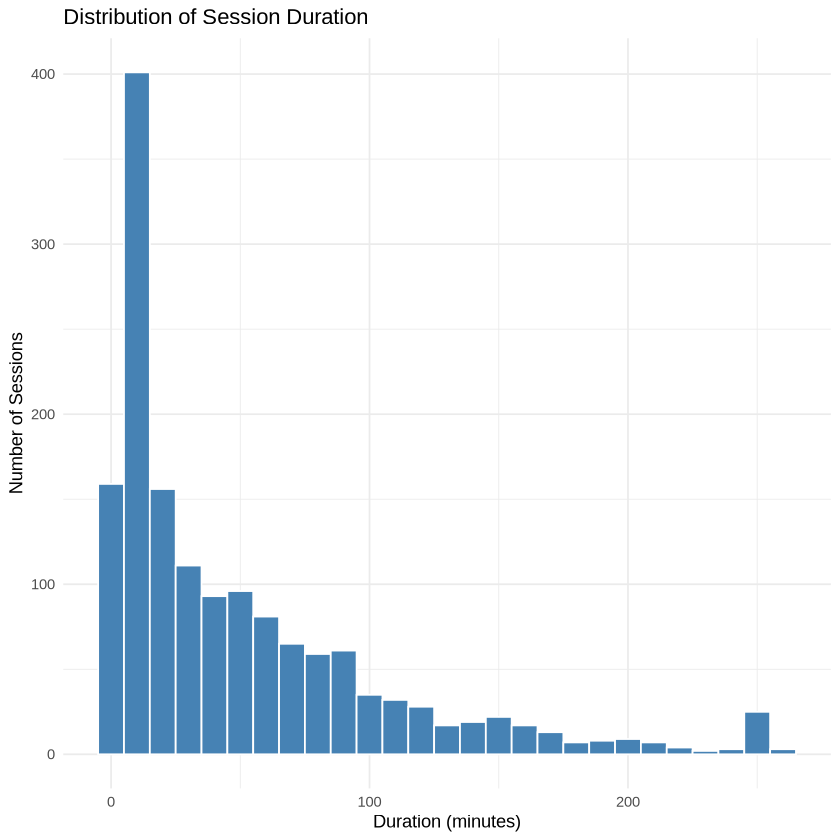

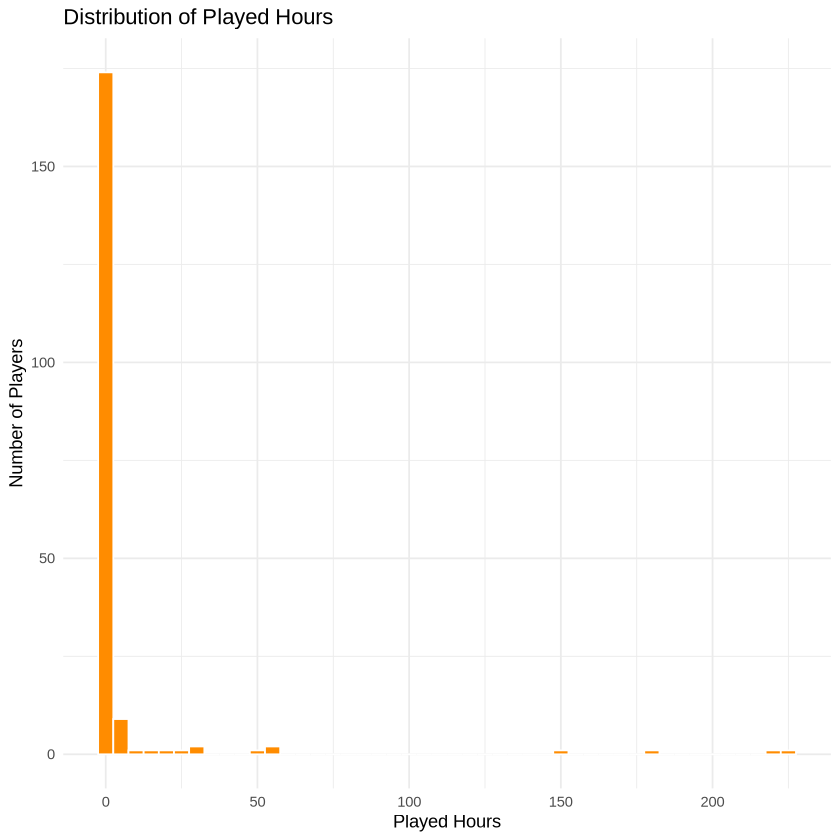

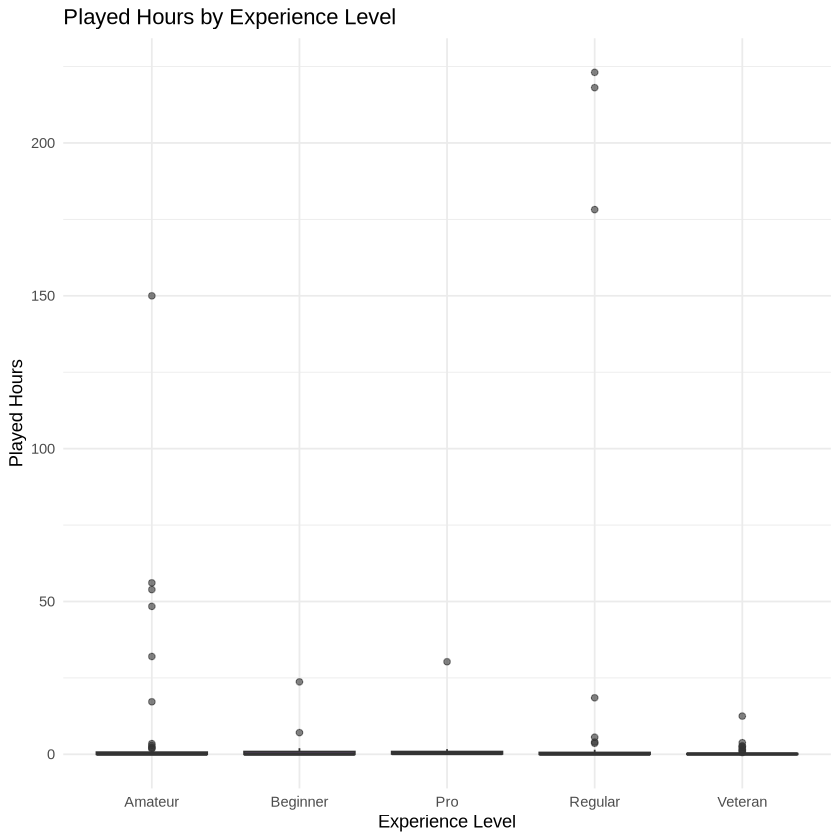

In [33]:
# wrangling
sessions_data <- sessions |>
    # googled how to format time in R
    mutate(start_time = strptime(start_time, format = "%d/%m/%Y %H:%M"),
         end_time   = strptime(end_time,   format = "%d/%m/%Y %H:%M"),
         duration_minutes = as.numeric(difftime(end_time, start_time, units = "mins")))

players_data <- players

# average played hours and average age tibble
player_means <- players_data |>
    select(where(is.numeric)) |>
    summarise(across(everything(), \(x) round(mean(x, na.rm = TRUE), 2)))

player_means

# Session duration distribution
ggplot(sessions_data, aes(x = duration_minutes)) +
  geom_histogram(binwidth = 10, fill = "steelblue", color = "white") +
  labs(title = "Distribution of Session Duration",
       x = "Duration (minutes)",
       y = "Number of Sessions") +
  theme_minimal()

# Played hours distribution
ggplot(players_data, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, fill = "darkorange", color = "white") +
  labs(title = "Distribution of Played Hours",
       x = "Played Hours",
       y = "Number of Players") +
  theme_minimal()

# Played hours by experience
ggplot(players_data, aes(x = experience, y = played_hours)) +
    geom_boxplot(fill = "purple", alpha = 0.6) +
    labs(title = "Played Hours by Experience Level",
       x = "Experience Level",
       y = "Played Hours") +
    theme_minimal()

### Interpreting Visualizations
- Session duration is right-skewed, with some very long sessions (likely AFK).
- Played hours in players.csv also show skew as many players play very little, a few play a lot.
- More experienced players tend to have more total played hours.
- The variability in both datasets suggests that gameplay activity may relate to session duration.

In [ ]:
source("cleanup.R")